## Linear methods for regression and classification
In this jupyter notebook, we will practice the topics covered in the lectures. Specially, we will do hands-on practice of:
- load and prepare data for machine learning model training and testing
- train and test linear models (linear regression (lasso/ridge), polynomial regression, and logistic regression)
- compare and understand model performance 

For implementations that have fixed results, we provide running examples for your reference. *You might get slightly different results due to the sklearn version you are using, just leave a comment to indicate your version where you get different results.*<br>

## Linear Regression and Polynomial Regression
In this section, we will explore the diabetes dataset:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>

This dataset contains n = 442 diabetes patients' information of ten variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. Each patient has a quantitative value of disease progression one year after baseline.


We will fit different regression models to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target variable <br>
    
2. Prepare data for model training and testing <br>

3. Fit different regression models (linear/lasso/ridge) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

**Note:** please always add comments to explain your observations/findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# there are different ways to load the dataset, please make sure you understand the mechanism
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
data = load_diabetes(as_frame=True)

### Basic dataset exploration 

In [4]:
data.data.shape, data.target.shape

((442, 10), (442,))

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
np.round(data.frame.describe(),3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


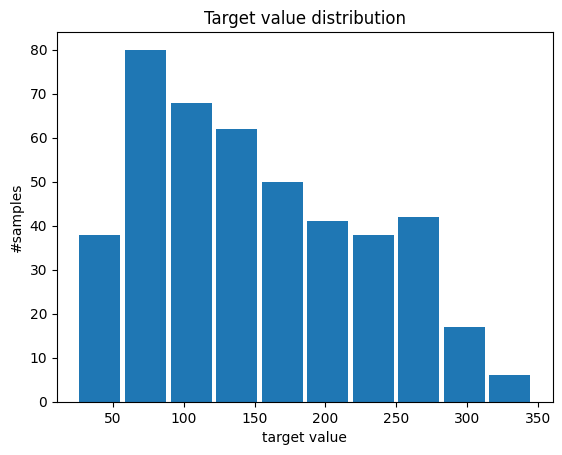

In [8]:
# plot a histogram to visualize the distribution of the "target" value
plt.hist(data.frame['target'], rwidth=0.9)
plt.title("Target value distribution")
plt.xlabel("target value")
plt.ylabel("#samples");

### Prepare data for model training and testing

In [9]:
# Split the data into 70% training and 30% testing
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Remember to set random_state to control for the randomness

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [10]:
# check feature matrix
X_train.shape, X_test.shape

((309, 10), (133, 10))

### Fit the linear regression model on the training set and evaluate model performance on the testing set 
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [16]:
reg = LinearRegression() # check the documentation to understand the default parameters
reg.fit(X_train, y_train)
reg_score = reg.score(X_test, y_test)
np.round(reg_score,3)

0.477

**Interpret model coefficients and intercept**

In [12]:
np.round(reg.coef_,3)

array([  29.254, -261.706,  546.3  ,  388.398, -901.96 ,  506.763,
        121.154,  288.035,  659.269,   41.377])

In [13]:
np.round(reg.intercept_,3)

151.008

**Your task**: write down the linear regression model with the above coefficients and intercept

In [ ]:
"""
target = 29.254 * age - 261.706 * sex + 546.300 * bmi + 388.398 * bp - 901.960 * s1 + 506.763 * s2 + 121.154 * s3 + 288.035 * s4 + 659.269 * s5 + 41.377 * s6 + 151.008
"""

**Your task**: explore other parameters/attributes/methods
- fit_intercept
- feature_names_in_, n_features_in_
Write your exploration code and results below

In [15]:
fit_intercept_values = [True, False]

for fit_intercept in fit_intercept_values:
    reg1 = LinearRegression(fit_intercept=fit_intercept)
    reg1.fit(X_train, y_train)
    score = reg1.score(X_test, y_test)
    print('{}: {:.3f}'.format(fit_intercept, score))

True: 0.477
False: -4.102


If intercept is not considered, the performance of the model is worse.

In [17]:
reg.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

feature_names_in_ attribute shows the names of features in the model.

In [18]:
reg.n_features_in_

10

n_features_in_ attribute shows the number of features.

### Fit and evaluate a Ridge regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [19]:
rg_reg = Ridge()
rg_reg.fit(X_train, y_train)
rg_reg_score = rg_reg.score(X_test, y_test)
np.round(rg_reg_score,3)

0.423

In [20]:
np.round(rg_reg.coef_,3)

array([  45.054,  -71.947,  280.716,  195.213,   -2.229,  -17.541,
       -148.689,  120.467,  198.614,  106.935])

In [21]:
np.round(rg_reg.intercept_,3)

151.867

### Your task: fit and evaluate a Lasso regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [22]:
# Fit model
ls_reg = Lasso()
ls_reg.fit(X_train, y_train)

Lasso()

In [23]:
# Evaluate model performance
ls_reg_score = ls_reg.score(X_test, y_test)
np.round(ls_reg_score,3)

0.362

In [24]:
# Interpret model coefficients and intercept
np.round(ls_reg.coef_,3)

array([  0.   ,  -0.   , 443.703,  51.601,   0.   ,   0.   ,  -0.   ,
         0.   , 201.966,   0.   ])

In [25]:
np.round(ls_reg.intercept_,3)

152.166

### Your task: compare the linear/ridge/lasso regression models
- write down your code to create and display the given dataframe

In [35]:
# hint: the following dataframe shows the expected way to organize and display the information
# make sure to: 
# - round to 3 digits after the decimal point
# - rename the column names 
# - include intercept and score in the last two rows
df = pd.DataFrame({'linear': np.round(reg.coef_,3),
                   'ridge': np.round(rg_reg.coef_,3),
                   'lasso': np.round(ls_reg.coef_,3)})
df.rename(index=dict(enumerate(data.feature_names)), inplace=True)
df.loc['intercept'] = [np.round(reg.intercept_,3), np.round(rg_reg.intercept_,3), np.round(ls_reg.intercept_,3)]
df.loc['score'] = [np.round(reg_score,3), np.round(rg_reg_score,3), np.round(ls_reg_score,3)]
df

,linear,ridge,lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


**Your observations and thoughts of comparing the three models**
- hint: connect this with what we discussed in the lectures, e.g.
    - how does regularization affect coefficients and model performance 
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty) 

In [ ]:
'''
The regularization affects the model performance negatively, however, the coefficients decrease.
For L1 penalty, some relatively small coefficients are reduced to zero.
For L2 penalty, relatively bigger coefficients are reduced more severely.
'''

## Polynomial regression
- Use the diabetes data with the same train and test set to fit several **Polynomial regression** models 
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Fit a polynomail regression model with degree=2

In [36]:
# generate the new polynomial feature matrix for the training data 
# "fit_transform" on the original training data

poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_train_poly2.shape

(309, 66)

In [37]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly2 = poly2.transform(X_test)
X_test_poly2.shape

(133, 66)

In [38]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 

poly2_reg = LinearRegression()
poly2_reg.fit(X_train_poly2, y_train)
poly2_score = poly2_reg.score(X_test_poly2, y_test)
np.round(poly2_score,3)

0.413

### Your task: fit a polynomail regression model with degree=1
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=1** (name it as $poly1\_reg$)

In [39]:
poly1 = PolynomialFeatures(1)
X_train_poly1 = poly1.fit_transform(X_train)
X_train_poly1.shape

(309, 11)

In [40]:
X_test_poly1 = poly1.transform(X_test)
X_test_poly1.shape

(133, 11)

In [41]:
poly1_reg = LinearRegression()
poly1_reg.fit(X_train_poly1, y_train)
poly1_score = poly1_reg.score(X_test_poly1, y_test)
np.round(poly1_score,3)

0.477

### Your task: fit a polynomail regression model with degree=3
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=3** (name it as $poly3\_reg$)

In [57]:
poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train)
X_train_poly3.shape

(309, 286)

In [58]:
X_test_poly3 = poly3.transform(X_test)
X_test_poly3.shape

(133, 286)

In [59]:
poly3_reg = LinearRegression()
poly3_reg.fit(X_train_poly3, y_train)
poly3_score = poly3_reg.score(X_test_poly3, y_test)
np.round(poly3_score,3)

-92.583

### Your task: compare the polynomial regression models with degree=1/2/3 and the original linear regression model
- please write code to create and display the given data frame

In [64]:
df = pd.DataFrame(columns=['linear', 'poly_d1', 'poly_d2', 'poly_d3'])
pd.set_option('display.float_format', '{:.3f}'.format)
df.loc['intercept'] = [reg.intercept_, poly1_reg.intercept_, poly2_reg.intercept_, poly3_reg.intercept_]
df.loc['score'] = [reg_score, poly1_score, poly2_score, poly3_score]
df

,linear,poly_d1,poly_d2,poly_d3
intercept,151.008,151.008,-360.919,23716369348481188.000
score,0.477,0.477,0.413,-92.583


### Your task: observations and thoughts of comparing the above four models
- hint: connect this with overfitting/underfitting we discussed in class

In [ ]:
'''
The rank 3 polynomial model is clear to be so overfitting the training set, that it performs so bad for the testing set.
Rank that is too high also make it very hard to interpret the intercept.
'''

### Your task: interpret the model performance wrt the task itself
- how does each feature relate with diabetes
- which factors contribute positively/negatively/most/least to diabetes
- does these statistical correlations make sense from biological perspective? 

In [ ]:
'''
The sex and s1 (tc) contribute negatively to diabetes. The sex variable makes sense from biological perspective. However, the role of tc is rather harder to understand, as a higher tc often indicate a worse metabolic status.
The other factors all contribute positively to diabetes, most of which make sense, except for the s3 (hdl), since a higher s3 usually indicates a better metabolic status.
'''

## Linear models for classification: LogisticRegression 
In this section, we will work on a banknote authentication dataset:
- Original data source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>

This dataset contains n = 1372 images of genuine and forged banknote-like specimens. Each image is represented by four features extracted from Wavelet Transform tool: 
    1. variance (continuous) 
    2. skewness (continuous)
    3. curtosis (continuous)
    4. entropy of image (continuous)

And each image has a binary label of 0/1 indicating whether the banknote is forged or genuine.

We will fit several logistic regression models with different parameter settings to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target values <br>
    
2. Prepare data for model training and testing <br>

3. Fit different logistic regression models (vary by parameter settings) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

In [65]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [66]:
# please change to your file path
df_data = pickle.load(open('banknote_authentication_dataframe.pickle','rb'))

### Basic dataset exploration

In [67]:
# display the dataset
df_data

,variance,skewness,curtosis,entropy,class
0,3.622,8.666,-2.807,-0.447,0.000
1,4.546,8.167,-2.459,-1.462,0.000
2,3.866,-2.638,1.924,0.106,0.000
3,3.457,9.523,-4.011,-3.594,0.000
4,0.329,-4.455,4.572,-0.989,0.000
...,...,...,...,...,...
1367,0.406,1.349,-1.450,-0.559,1.000
1368,-1.389,-4.877,6.477,0.342,1.000
1369,-3.750,-13.459,17.593,-2.777,1.000
1370,-3.564,-8.383,12.393,-1.282,1.000


In [68]:
# describe the data 
df_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000,1372.000,1372.000,1372.000,1372.000
mean,0.434,1.922,1.398,-1.192,0.445
std,2.843,5.869,4.310,2.101,0.497
min,-7.042,-13.773,-5.286,-8.548,0.000
25%,-1.773,-1.708,-1.575,-2.413,0.000
50%,0.496,2.320,0.617,-0.587,0.000
75%,2.821,6.815,3.179,0.395,1.000
max,6.825,12.952,17.927,2.450,1.000


### Prepara data for model training and testing

In [69]:
feature_names = ['variance','skewness','curtosis','entropy']

# Construct feature matrix from the data frame
X_data = df_data[feature_names]
y_data = df_data['class']
X_data.shape, y_data.shape, Counter(y_data)

((1372, 4), (1372,), Counter({0.0: 762, 1.0: 610}))

In [70]:
# split the data into 70% training and 30% testing using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

### Fit LogisticRegression models with different parameter settings
- L1 VS L2 penalty
- C values (inverse of regularization strength)

In [90]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.0).fit(X_train, y_train)

In [72]:
clf.score(X_test, y_test)

0.9878640776699029

In [73]:
clf.predict(X_test[:3])

array([0., 0., 0.])

In [74]:
np.round(clf.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.982, 0.018],
       [0.996, 0.004]])

**Your task**: explore at least one different set of parameters to re-fit the model: solver, penalty, C

In [77]:
penalty_lst = ['l1', 'l2']

for penalty in penalty_lst:
    reg_p = LogisticRegression(random_state=0, solver='liblinear', penalty=penalty, C=1.0).fit(X_train, y_train)
    score = reg_p.score(X_test, y_test)
    print('{}: {:.3f}'.format(penalty, score))

l1: 0.988
l2: 0.988


the penalty parameter seems to have no significant influence on the model performance.

### Compare model performance with different c values and different penalties

In [87]:
def compare_c(X_train, y_train, X_test, y_test, p):
    """
    X_train/test: 2D feature matrix of training/testing data
    y_train/test: 1D array of training/testing labels
    p: the penalty parameter setting in LogisticRegression
    
    return: 
        a list of classifiers fitted with different c values
        a dataframe that is shown in the running example below
    """
     
    # set the model parameter c to different values and train the model 
    # for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    #    fit a LogisticRegression model with: the current c value, the given penalty p, set random_state=42, max_iter=1000, solver='liblinear', and use default setting for other parameters
    #    test and record the model performance 
    #    get the statistical information about the model coefficients: 
    #        min: minimum coefficient
    #        max: minimum coefficient
    #        mean(abs(coef)): average over the absolute coefficient values
    #        n_zero: number of coefficients equal to zero 
    
    ### Your code starts from here 
    clf_df = pd.DataFrame(columns=['c', 'min', 'max', 'mean_abs', 'n_zero', 'test_score'])
    c_lst = [0.001, 0.01, 0.1, 1, 10, 100]
    clf_lst = []
    for i in range(len(c_lst)):
        reg_l = LogisticRegression(random_state=0, solver='liblinear', penalty=p, C=c_lst[i]).fit(X_train, y_train)
        cf_reg = reg_l.coef_
        clf_df.loc[i] = [c_lst[i], np.min(cf_reg), np.max(cf_reg), np.mean(abs(cf_reg)), len(cf_reg[0]) - np.count_nonzero(cf_reg), reg_l.score(X_test, y_test)]
        clf_lst.append(reg_l)
    return clf_lst, clf_df

In [88]:
# running example
l2_clfs, c_effect_l2 = compare_c(X_train, y_train, X_test, y_test, p='l2')
c_effect_l2

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.357,-0.074,0.190,0.000,0.922
1,0.010,-0.861,-0.173,0.485,0.000,0.973
2,0.100,-1.581,-0.163,0.915,0.000,0.988
3,1.000,-2.835,-0.166,1.645,0.000,0.988
4,10.000,-5.171,-0.290,2.937,0.000,0.988
5,100.000,-7.648,-0.438,4.297,0.000,0.990


In [89]:
# running example
l1_clfs, c_effect_l1 = compare_c(X_train, y_train, X_test, y_test, p='l1')
c_effect_l1

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.042,0.000,0.010,3.000,0.624
1,0.010,-0.807,0.000,0.328,1.000,0.917
2,0.100,-1.749,0.000,0.935,1.000,0.988
3,1.000,-3.852,-0.133,2.172,0.000,0.988
4,10.000,-7.081,-0.387,3.977,0.000,0.990
5,100.000,-8.179,-0.463,4.586,0.000,0.990


**Your thoughts and observations:** 
  - explain model performance from the perspective of under-fitting VS over-fitting
  - compare the two tables and indicate the difference between L1 and L2 penalty
  - how does c affect coefficients and model performance in each table 

In [ ]:
'''
If the coefficients of too many features are reduced to zero, model would be under-fitted, leading to a worse performance.
The l1 reduces coefficients of many features to zero, while l2 tends to retain variables.
As c increases, the strength of regularization drops, thus leading to a better performance of the model.
'''

### Interpret the model performance wrt the banknote authentication task
- how does each feature relate with the identification of genuine and forged banknote
- does these statistical correlations make sense from the perspective of image recognition 

In [91]:
clf.coef_

array([[-3.85152883, -2.11687242, -2.58471858, -0.13330502]])

Every feature influence the identification negatively, while the influence of entropy is rather minor.
This conclusion generally makes sense.

## Summary
Congratulations for completing this exercise! In this notebook, with hands-on practice of linear models for regression and classification tasks, we gain deep understanding of:
- overfitting VS underfitting
- difference between l1 and l2 regularizations
- the effect of regularization strength on model performance

## Which part(s) you find most interesting/chanlleging?

In [92]:
'''
The parameters of different models are interesting while also quite challenging theoretically.
'''

'\nThe parameters of different models are interesting while also quite challenging theoretically.\n'